# Imports

In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load File

In [2]:
f = gzip.open('goemotions.json.gz','rb') # Open .gz zip file
jsonFile = f.read()
y = json.loads(jsonFile)  # Store all contents into an array
y = np.array(y) # Convert array to np array

# Generate Pie Charts

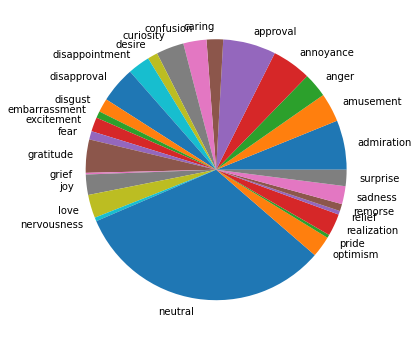

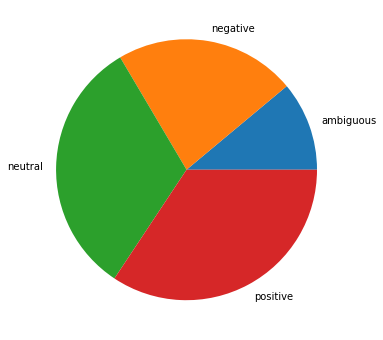

In [3]:
# Extract the 2nd and 3rd columns (emotions and sentiments)
emotions = y[:,1] 
sentiments = y[:,2]

# Count the total number of each emotion/sentiment
eValues, eCounts = np.unique(emotions, return_counts=True)
sValues, sCounts = np.unique(sentiments, return_counts=True)

efig = plt.figure(figsize=(6, 6))
plt.pie(eCounts, labels = eValues)
plt.show() 
efig.savefig('emotions.png', dpi=efig.dpi)
sfig = plt.figure(figsize=(6, 6))
plt.pie(sCounts, labels = sValues)
plt.show() 
sfig.savefig('sentiments.png', dpi=sfig.dpi)

# Process Dataset

In [4]:
corpus = y[:,0]
#Transform corpus to word count sparse matrix
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)
#Print the number of words
print(len(vectorizer.get_feature_names_out())) 

30449


# Split Dataset

In [5]:
#Split the dataset and the emotions/sentiments into train and test with seed 1
corpus_train, corpus_test, emotions_train, emotions_test, sentiments_train, sentiments_test = train_test_split(x, emotions, sentiments, test_size=0.2, random_state=1)

# Base-MNB

In [6]:
#Create and train model
classifierMNBemotions = MultinomialNB()
modelMNBemotions = classifierMNBemotions.fit(corpus_train, emotions_train)
predictMNBemotions = modelMNBemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMNBemotions = confusion_matrix(emotions_test, predictMNBemotions)
print(classification_report(emotions_test, predictMNBemotions, zero_division=0))

#Write everything to file
f = open("Base_MNB_emotions.txt", "w")
f.write("Base Multinomial Naive Bayes for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixMNBemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictMNBemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.47      0.43      0.45      2126
     amusement       0.52      0.29      0.37      1212
         anger       0.46      0.13      0.20      1126
     annoyance       0.19      0.07      0.10      1686
      approval       0.23      0.08      0.12      2304
        caring       0.29      0.05      0.09       672
     confusion       0.35      0.05      0.09      1010
     curiosity       0.41      0.11      0.17      1113
        desire       0.33      0.05      0.09       380
disappointment       0.28      0.04      0.07       907
   disapproval       0.26      0.08      0.12      1523
       disgust       0.42      0.08      0.14       568
 embarrassment       0.57      0.01      0.03       312
    excitement       0.38      0.05      0.09       595
          fear       0.43      0.03      0.05       350
     gratitude       0.74      0.67      0.70      1404
         grief       0.00      0.00      0.00  

In [7]:
#Create and train model
classifierMNBsentiments = MultinomialNB()
modelMNBsentiments = classifierMNBsentiments.fit(corpus_train, sentiments_train)
predictMNBsentiments = modelMNBsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMNBsentiments = confusion_matrix(sentiments_test, predictMNBsentiments)
print(classification_report(sentiments_test, predictMNBsentiments, zero_division=0))

#Write everything to file
f = open("Base_MNB_sentiments.txt", "w")
f.write("Base Multinomial Naive Bayes for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixMNBsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictMNBsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.42      0.23      0.30      3792
    negative       0.53      0.52      0.52      7752
     neutral       0.49      0.49      0.49     11075
    positive       0.61      0.70      0.65     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364

